# Prediction with imbalanced classes

In [208]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [266]:
import matplotlib.pyplot as plt

In [267]:
import os
os.getcwd()

'/Users/JohanLg/Documents/My Documents/ESCP/Kurser/Vår/Python'

In [211]:
os.chdir('/Users/JohanLg/Documents/My Documents/ESCP/Kurser/Vår/Python')

In [212]:
data = pd.read_csv('train (2).csv')

In [213]:
print(data.shape)

(31428, 27)


In [214]:
# We know that prefix N indicates count values

data.head(6)

# Next step to check for missing values

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646
5,-1,187,19274374,-1,0,3302106226,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,3182036626,2379633508,1284343215


In [215]:
null = data.isnull()
null.sum()/len(data)

#No missing Values

label           0.0
id              0.0
visitTime       0.0
purchaseTime    0.0
hour            0.0
C1              0.0
C2              0.0
C3              0.0
C4              0.0
C5              0.0
C6              0.0
C7              0.0
C8              0.0
N1              0.0
C9              0.0
N2              0.0
N3              0.0
N4              0.0
N5              0.0
N6              0.0
N7              0.0
N8              0.0
N9              0.0
N10             0.0
C10             0.0
C11             0.0
C12             0.0
dtype: float64

In [216]:
Categorical_Var = data.iloc[:,data.columns.str.startswith('C')] 

for i in range(1,len(Categorical_Var.columns)):
    Cat_Counts = Categorical_Var.iloc[:,i].value_counts()
    print ("    Var %s     " % i)
    print(Cat_Counts)

    Var 1     
403381353     11098
1235983246     6173
2018710401     5397
2541203883     3860
1830830742     3625
1258965892      635
2517724481      635
2201746798        5
Name: C2, dtype: int64
    Var 2     
1928325921    1232
3475347077    1212
2780744710    1179
1711803242     936
1822656032     536
              ... 
3540895230       1
2756181513       1
3550862535       1
1199484467       1
1533319149       1
Name: C3, Length: 2863, dtype: int64
    Var 3     
652481754     20951
2308170622     6081
306394936      2844
2210625817     1552
Name: C4, dtype: int64
    Var 4     
2967512603    23045
2116767313     8364
3955179140       19
Name: C5, dtype: int64
    Var 5     
571765677     5194
2712499304    3835
4003458018    1886
85977907      1715
152923169     1092
              ... 
3390967276      13
3912268313      12
2116604436       9
2762466016       9
4088755483       7
Name: C6, Length: 84, dtype: int64
    Var 6     
2303407174    24113
1342367140     4123
2411180110 

 Var 1  


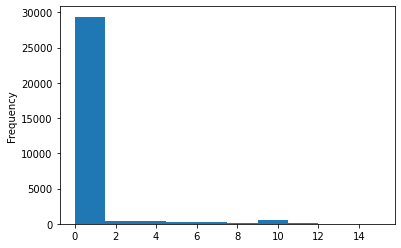

 Var 2  


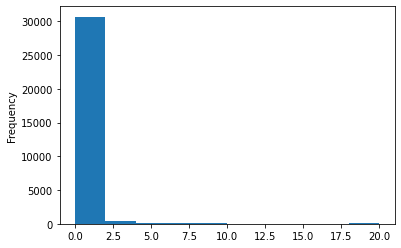

 Var 3  


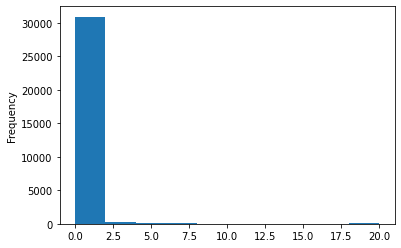

 Var 4  


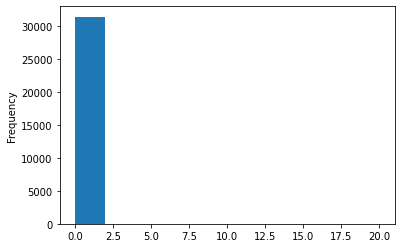

 Var 5  


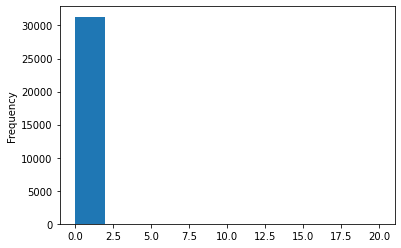

 Var 6  


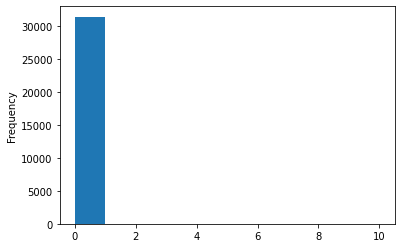

 Var 7  


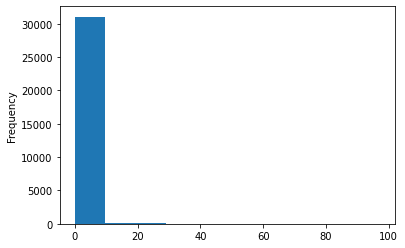

 Var 8  


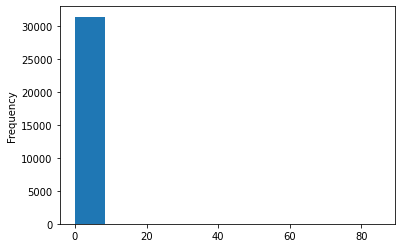

 Var 9  


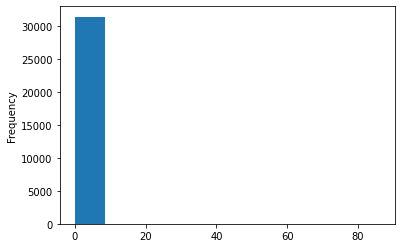

IndexError: single positional indexer is out-of-bounds

In [217]:
Numerical_Var = data.iloc[:,data.columns.str.startswith('N')]


for i in range(1, len(Numerical_Var)):
    Numerical_Var.iloc[:,i].plot.hist()
    
    print(" Var %s  " %i)
    
    plt.show()

# Dependant variable inbalanced 


In [218]:
X=data.drop(["label","purchaseTime"], axis=1)
y=data['label']

In [219]:
# Normalizing numeric data

for i in Numerical_Var:
    x= X[[i]].values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    X[i]=x_scaled
    

In [220]:
X

,id,visitTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,37,19274330,0,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,419316267,3617851689,4220791646
1,55,19274334,0,3191875643,403381353,1238330876,652481754,2967512603,179712055,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,0.183475,-0.041971,-0.049696,1968545380,3831440054,1213938795
2,114,19274353,0,2634604934,403381353,1928325921,652481754,2967512603,1607619193,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1405802835,2379633508,1284343215
3,128,19274358,0,2569487005,403381353,296915027,652481754,2967512603,10212495,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,2299319102,3617851689,4220791646
4,164,19274367,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1306075469,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31423,638420,19360259,23,2569487005,2018710401,1712143179,2308170622,2967512603,3624739744,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,773194559,3617851689,4220791646
31424,638422,19360260,23,2569487005,403381353,2280365090,652481754,2967512603,3624739744,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,4038791635,3617851689,4220791646
31425,638461,19360392,23,497926344,1235983246,1379688777,652481754,2116767313,2304197778,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1169636883,621902171,3706004275
31426,638496,19360528,23,2569487005,403381353,2780744710,652481754,2967512603,3624739744,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,357042422,3617851689,4220791646


# Inbalanced classes. Running different variants of sampling methods


## NAIVE RESAMPLING , SMOTE


In [56]:
import sys
!{sys.executable} -m pip install -U imbalanced-learn --ignore-installed scikit-learn 

  Using cached imbalanced_learn-0.6.2-py3-none-any.whl (163 kB)
  Using cached scikit_learn-0.22.2.post1-cp36-cp36m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached scipy-1.4.1-cp36-cp36m-macosx_10_6_intel.whl (28.5 MB)
     |████████████████████████████████| 15.2 MB 504 kB/s eta 0:00:01    |█████▉                          | 2.8 MB 378 kB/s eta 0:00:33     |██████████                      | 4.8 MB 478 kB/s eta 0:00:22     |█████████████████████████▏      | 11.9 MB 614 kB/s eta 0:00:06
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/anaconda/lib/python3.6/site-packages/numpy/.dylibs/libopenblasp-r0.3.7.dylib'
Consider using the `--user` option or check the permissions.



In [221]:
from imblearn.over_sampling import RandomOverSampler


In [222]:
from imblearn.over_sampling import SMOTE, ADASYN

### Oversample and then re-shuffle naively

In [223]:
ros = RandomOverSampler(random_state=1, sampling_strategy=0.1)

In [224]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [225]:
y_resampled.value_counts()

# Class rebalanced to equal occurances 

-1    31371
 1     3137
Name: label, dtype: int64

### Resample with SMOTE

In [226]:
X_resampledSMOTE, y_resampledSMOTE = SMOTE(random_state=1, sampling_strategy=0.1).fit_resample(X, y)

In [227]:
y_resampledSMOTE.value_counts()

-1    31371
 1     3137
Name: label, dtype: int64

### Train Test splitting with NaiveS

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
 X_resampled, y_resampled, test_size=0.33, random_state=42)

In [229]:
from sklearn.ensemble import RandomForestClassifier

### Train Test splitting with SMOTE

In [230]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(
 X_resampledSMOTE, y_resampledSMOTE, test_size=0.33, random_state=42)

In [231]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### Random Forest

In [232]:
rf = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [233]:
rf.feature_importances_

array([0.03055176, 0.03132368, 0.01584719, 0.01196097, 0.00479328,
       0.01668011, 0.00318243, 0.00194642, 0.01791883, 0.00730987,
       0.01939471, 0.01082303, 0.01650657, 0.00236325, 0.05856803,
       0.04225862, 0.00106258, 0.11748599, 0.00222571, 0.07538201,
       0.24230091, 0.22935167, 0.02739031, 0.00437037, 0.00900171])

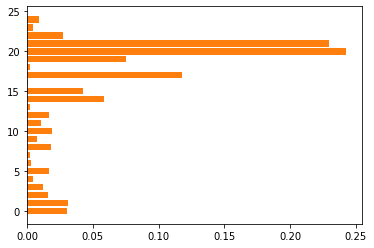

In [235]:
plt.barh(range(25), rf.feature_importances_)
plt.show(range(25))

In [240]:
imp_var = rf.feature_importances_ > 0.05
# Extract variables with gini > 0.1

In [241]:
imp1 = imp_var.tolist()

In [242]:

res = [i for i, val in enumerate(imp1) if val] 

In [243]:
X_train.iloc[:,res].head(6)

# NEW variables to be used to train model

,N3,N6,N8,N9,N10
25474,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
31368,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
7453,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
11051,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
102,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
898,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696


### Random Forest on SMOTE 

In [244]:
rf = RandomForestClassifier(n_estimators = 100).fit(X_trainS, y_trainS)

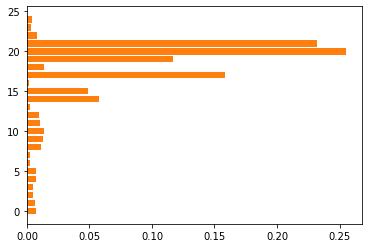

In [246]:
plt.barh(range(25), rf.feature_importances_)
plt.show(range(25))

In [248]:
imp_var = rf.feature_importances_ > 0.05
# Extract variables with gini > 0.1
imp1 = imp_var.tolist()
res = [i for i, val in enumerate(imp1) if val] 
X_trainS.iloc[:,res].head(6)

# We see that the oversampling technique doesnt change much in feature selection 
# therefore, the prediction will be made solely on the Random Oversampled enhanced dataset

,N3,N6,N8,N9,N10
25474,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
31368,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
7453,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
11051,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
102,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696
898,-0.132073,-0.048464,-0.130523,-0.041971,-0.049696


In [273]:
predictionsRF = rf.predict(X_test)

## XGBOOST

In [249]:
import xgboost as xgb

In [280]:
model = xgb.XGBClassifier(max_depth=1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
predictionsXG = model.predict(X_test)

[0]	validation_0-error:0.018945	validation_0-logloss:0.605184	validation_1-error:0.016772	validation_1-logloss:0.604794
[1]	validation_0-error:0.018945	validation_0-logloss:0.533197	validation_1-error:0.016772	validation_1-logloss:0.532453
[2]	validation_0-error:0.018945	validation_0-logloss:0.473291	validation_1-error:0.016772	validation_1-logloss:0.47222
[3]	validation_0-error:0.018945	validation_0-logloss:0.42281	validation_1-error:0.016772	validation_1-logloss:0.421436
[4]	validation_0-error:0.018945	validation_0-logloss:0.379861	validation_1-error:0.016772	validation_1-logloss:0.378202
[5]	validation_0-error:0.018945	validation_0-logloss:0.343044	validation_1-error:0.016772	validation_1-logloss:0.341115
[6]	validation_0-error:0.018945	validation_0-logloss:0.311292	validation_1-error:0.016772	validation_1-logloss:0.309107
[7]	validation_0-error:0.018945	validation_0-logloss:0.283777	validation_1-error:0.016772	validation_1-logloss:0.281349
[8]	validation_0-error:0.018945	validation

[68]	validation_0-error:0.018382	validation_0-logloss:0.070054	validation_1-error:0.016421	validation_1-logloss:0.064022
[69]	validation_0-error:0.018339	validation_0-logloss:0.06977	validation_1-error:0.016421	validation_1-logloss:0.063699
[70]	validation_0-error:0.018339	validation_0-logloss:0.069495	validation_1-error:0.016421	validation_1-logloss:0.063449
[71]	validation_0-error:0.018296	validation_0-logloss:0.069231	validation_1-error:0.016421	validation_1-logloss:0.063119
[72]	validation_0-error:0.018296	validation_0-logloss:0.068969	validation_1-error:0.016421	validation_1-logloss:0.062799
[73]	validation_0-error:0.018296	validation_0-logloss:0.068698	validation_1-error:0.016421	validation_1-logloss:0.062571
[74]	validation_0-error:0.018296	validation_0-logloss:0.068427	validation_1-error:0.016421	validation_1-logloss:0.062285
[75]	validation_0-error:0.018296	validation_0-logloss:0.06817	validation_1-error:0.016421	validation_1-logloss:0.06203
[76]	validation_0-error:0.018296	va

# Logistic Regression

In [281]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictionsLR = logmodel.predict(X_test)

# Prediction and Classifications

Next step is to compare the performance of our models RandomForest, Logistic Regression and XGBOOST

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [254]:
from sklearn.ensemble import GradientBoostingClassifier


In [105]:
from sklearn.metrics import plot_roc_curve

In [282]:
print(classification_report(y_test,predictionsRF))

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00     10340
           1       1.00      0.92      0.95      1048

    accuracy                           0.99     11388
   macro avg       0.99      0.96      0.98     11388
weighted avg       0.99      0.99      0.99     11388



In [283]:
print(classification_report(y_test,predictionsLR))

              precision    recall  f1-score   support

          -1       0.91      0.99      0.95     10340
           1       0.39      0.07      0.12      1048

    accuracy                           0.90     11388
   macro avg       0.65      0.53      0.54     11388
weighted avg       0.87      0.90      0.87     11388



In [284]:
print(classification_report(y_testS,predictionsXG))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99     10340
           1       0.97      0.85      0.91      1048

    accuracy                           0.98     11388
   macro avg       0.98      0.92      0.95     11388
weighted avg       0.98      0.98      0.98     11388



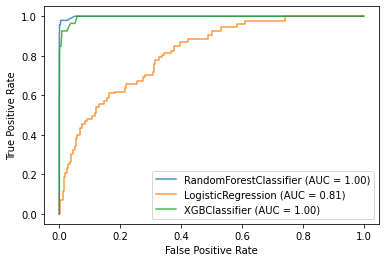

In [285]:
ax = plt.gca()
rf_roc = plot_roc_curve(rf, X_test, y_test,ax=ax, alpha=0.8)
lr_roc = plot_roc_curve(logmodel, X_test, y_test,ax=ax, alpha=0.8)
xg_roc = plot_roc_curve(model, X_test, y_test,ax=ax, alpha=0.8)
plt.show()

# We see the decision tree-based models are more accurate

# Final Fitting

In [286]:
test=pd.read_csv('test1Final.csv')

In [287]:
X=test.drop(["label","purchaseTime"], axis=1)
y=test['label']

In [288]:
for i in Numerical_Var:
    x= X[[i]].values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    X[i]=x_scaled

In [289]:
X.head()

,id,visitTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,1,19360733,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,2128770044,3617851689,4220791646
1,2,19360734,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,4256459078,2379633508,1284343215
2,3,19360735,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,2840358457,3831440054,1213938795
3,4,19360737,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,4039873369,535829057,3828748840
4,5,19360752,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,907610626,3617851689,4220791646


In [290]:
Y_pred = rf.predict_proba(X)
Ypred = pd.DataFrame(Y_pred)
test1 = test.id

In [296]:
Final_Pred = pd.concat([test1.reset_index(drop=True), Ypred.iloc[:,1].reset_index(drop=True)], axis=1)

In [297]:
print(Final_Pred)

print(len(test1) , len(Ypred))

print(test1.head(), Ypred.head())

          id     1
0          1  0.19
1          2  0.15
2          3  0.16
3          4  0.09
4          5  0.19
...      ...   ...
32081  32082  0.36
32082  32083  0.31
32083  32084  0.30
32084  32085  0.39
32085  32086  0.30

[32086 rows x 2 columns]
32086 32086
0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64       0     1
0  0.81  0.19
1  0.85  0.15
2  0.84  0.16
3  0.91  0.09
4  0.81  0.19


In [298]:
Final_Pred.to_csv('/Users/JohanLg/Documents/My Documents/ESCP/Kurser/Vår/Python/Assignment_23_e197443.csv')